In [1]:
# Generate and display a random schedule
from heuristics_constructive import ConstructiveHeuristics
from move import Move, get_moves, SwapBatchMove
from paintshop import PaintShop, Source


s = ConstructiveHeuristics(PaintShop(Source.NOVEMBER)).random.generate()
print(s)

# Generate all possible moves and print the amount
moves: list[Move] = get_moves(s)
print(f'\nAmount of moves: {len(moves)}')

# Generate the moved schedules for all the moves
moved_schedules = [move.get_moved(s) for move in moves]
print(f"Moves that do nothing: {sum([(s == moved_s) for moved_s in moved_schedules])}")

# Display the amount of unique moved schedules
print(f'Unique schedules after moves: {len(set(moved_schedules))}')

# Create a dictionary of moves by the hash-code of the moved schedule that they produce
by_hash = {}
for move in moves:
    
    # Get moved schedule
    moved = move.get_moved(s)
    
    # Get hash-code
    hash_code = hash(moved)
    
    # Add move if hash-code exists in dict, else: add it.
    if hash_code in by_hash.keys():
        by_hash[hash_code]["moves"] += [move]
    else:
        by_hash[hash_code] = {
            "moves": [move],
            "schedule": moved
        }
        
# Display all the non-unique moved schedules along with their moves
for hash_code, data in [(hash_code, data) for hash_code, data in by_hash.items() if len(data["moves"]) > 1]:
    print()
    print(data["schedule"])
    for move in data["moves"]:
        print(move)

[PaintShop] Loaded 'resources\PaintShop - November 2024.xlsx'
    |  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14 | 9565.53 ✔
M1: |  0   2   4   6   7  13  14  18  20  24  27  28  30  35  40 | 6108.00 (64%)
M2: |  3  10  17  19  22  23  26  31  34  36  38  39  41         | 2026.00 (21%)
M3: |  1   5   8   9  21  32  33  42  44                         | 792.47  (8%)
M4: | 11  12  15  16  25  29  37  43  45                         | 639.06  (7%)

Amount of moves: 3174
Moves that do nothing: 0
Unique schedules after moves: 3174


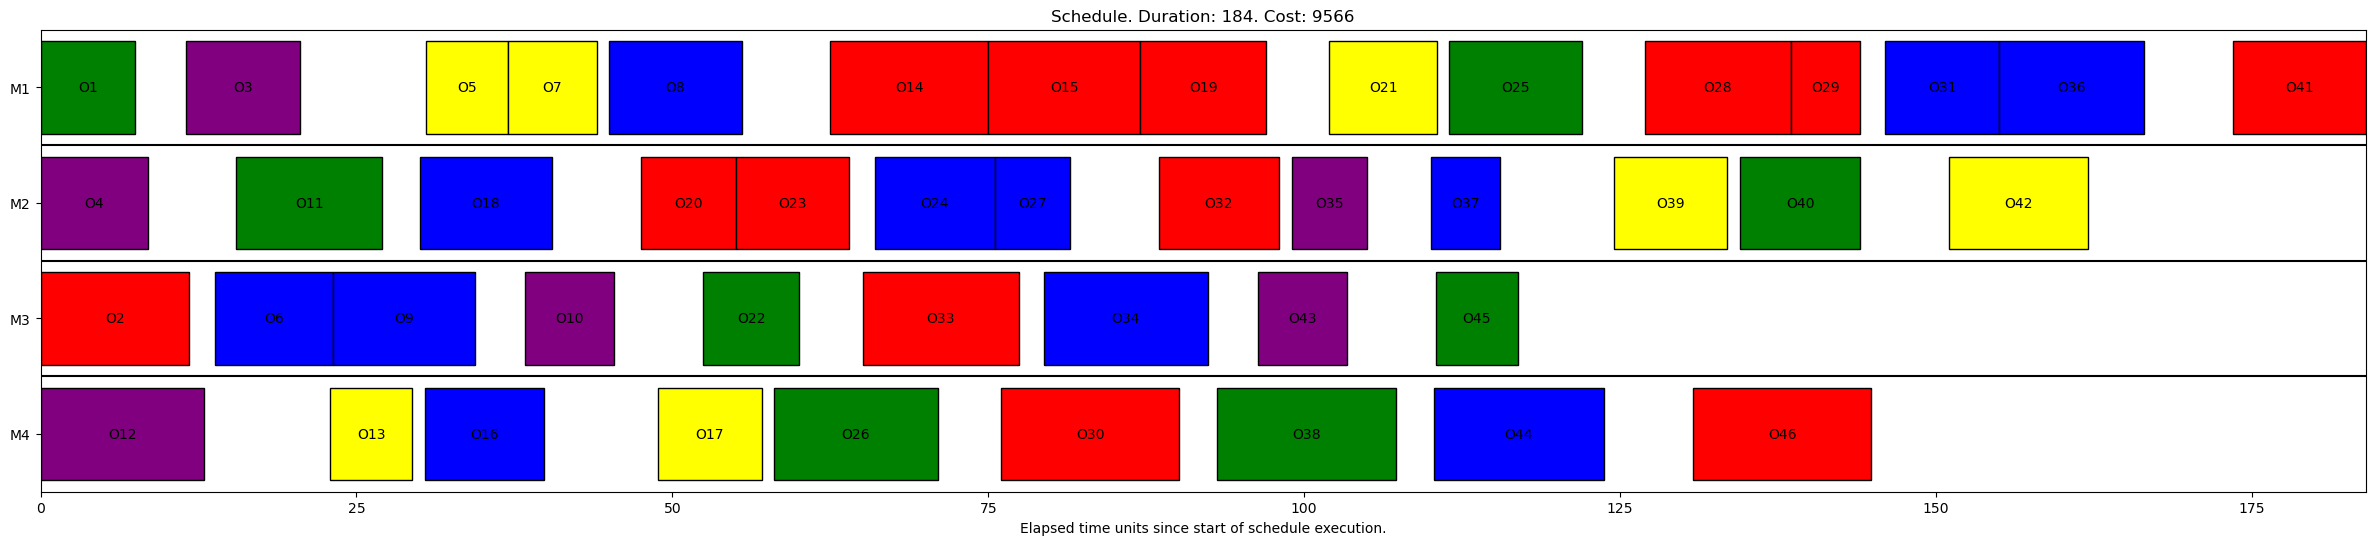

In [2]:
s.plot()

In [3]:
from heuristics_improvement import ImprovementHeuristics
from moveSelectionStrategy import MoveSelectionStrategies

opt = ImprovementHeuristics.basic(MoveSelectionStrategies.random).run(s, verbosity= 2)

1: [9414.15] swap: (1, 11) <=> (2, 7)
    |  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14 | 9414.15 ✔
M1: |  0   2   4   6   7  13  14  18  20  24  27  28  30  35  40 | 6108.00 (65%)
M2: |  3  10  17  19  22  23  26  31  34  36  38  42  41         | 2064.50 (22%)
M3: |  1   5   8   9  21  32  33  39  44                         | 602.59  (6%)
M4: | 11  12  15  16  25  29  37  43  45                         | 639.06  (7%)

2: [9382.15] swap: (1, 9) <=> (1, 12)
    |  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14 | 9382.15 ✔
M1: |  0   2   4   6   7  13  14  18  20  24  27  28  30  35  40 | 6108.00 (65%)
M2: |  3  10  17  19  22  23  26  31  34  41  38  42  36         | 2032.50 (22%)
M3: |  1   5   8   9  21  32  33  39  44                         | 602.59  (6%)
M4: | 11  12  15  16  25  29  37  43  45                         | 639.06  (7%)

3: [9314.12] move: (1, 3) => (3, 3)
    |  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14 | 9314.12 ✔
M1: |  0   

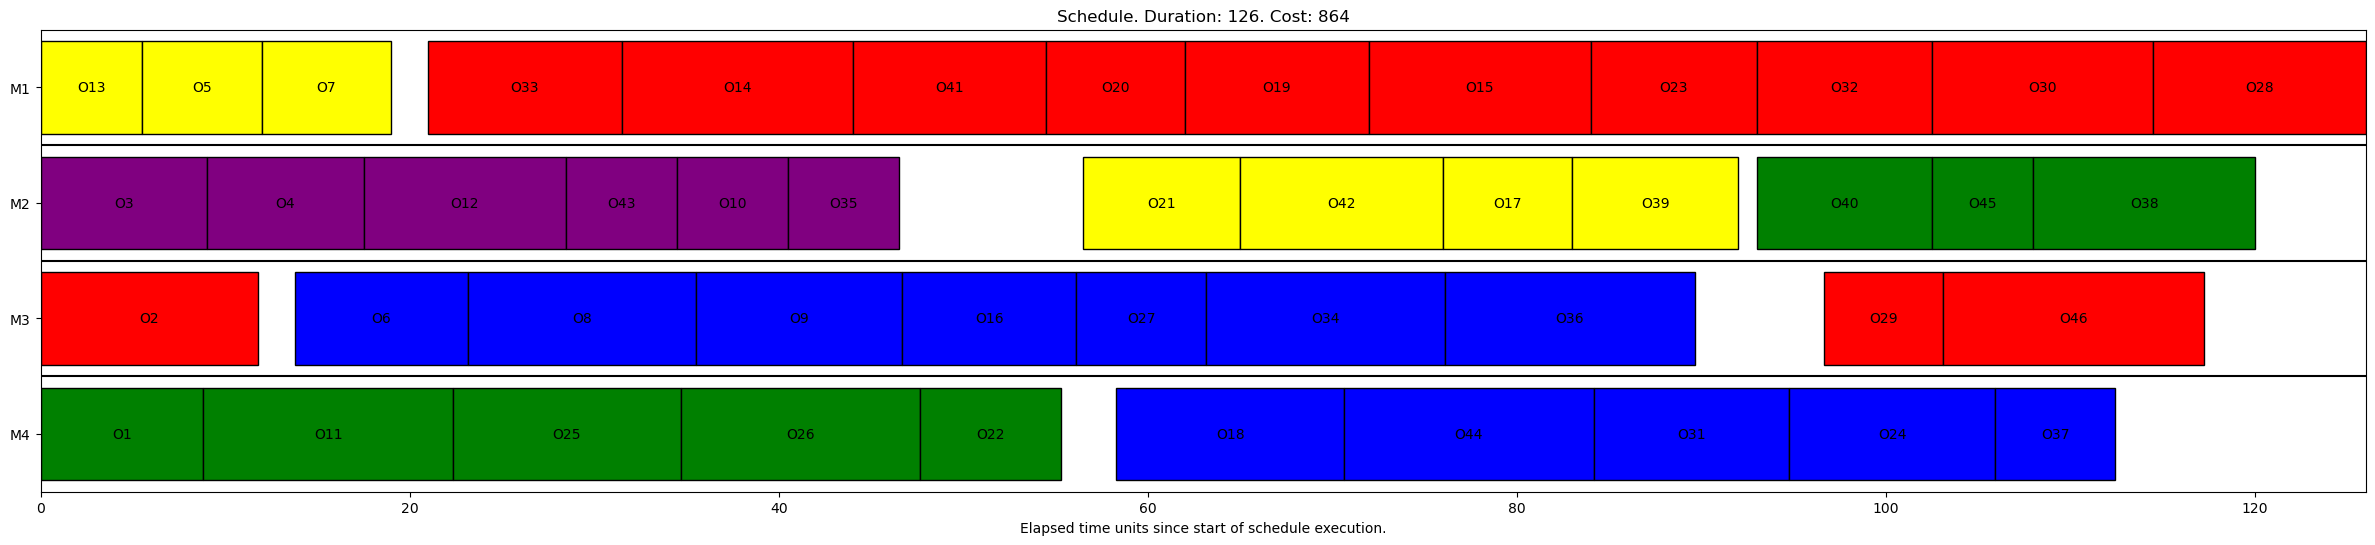

In [4]:
opt.best.plot()

### Apply a random batch-swap-move and check if it is correct:

    |  0   1   2   3   4   5   6   7   8   9  10  11  12 | 864.38 ✔
M1: | 12   4   6  32  13  40  19  18  14  22  31  29  27 | 458.00 (53%)
M2: |  2   3  11  42   9  34  20  41  16  38  39  44  37 | 165.50 (19%)
M3: |  1   5   7   8  15  26  33  35  28  45             | 177.88 (21%)
M4: |  0  10  24  25  21  17  43  30  23  36             | 63.00  (7%)

bswp: (0,[0,3]) => (2,[1,8])
    |  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16 | 6136.09 ✔
M1: |  5   7   8  15  26  33  35  32  13  40  19  18  14  22  31  29  27 | 5824.00 (95%)
M2: |  2   3  11  42   9  34  20  41  16  38  39  44  37                 | 165.50  (3%)
M3: |  1  12   4   6  28  45                                             | 83.59   (1%)
M4: |  0  10  24  25  21  17  43  30  23  36                             | 63.00   (1%)


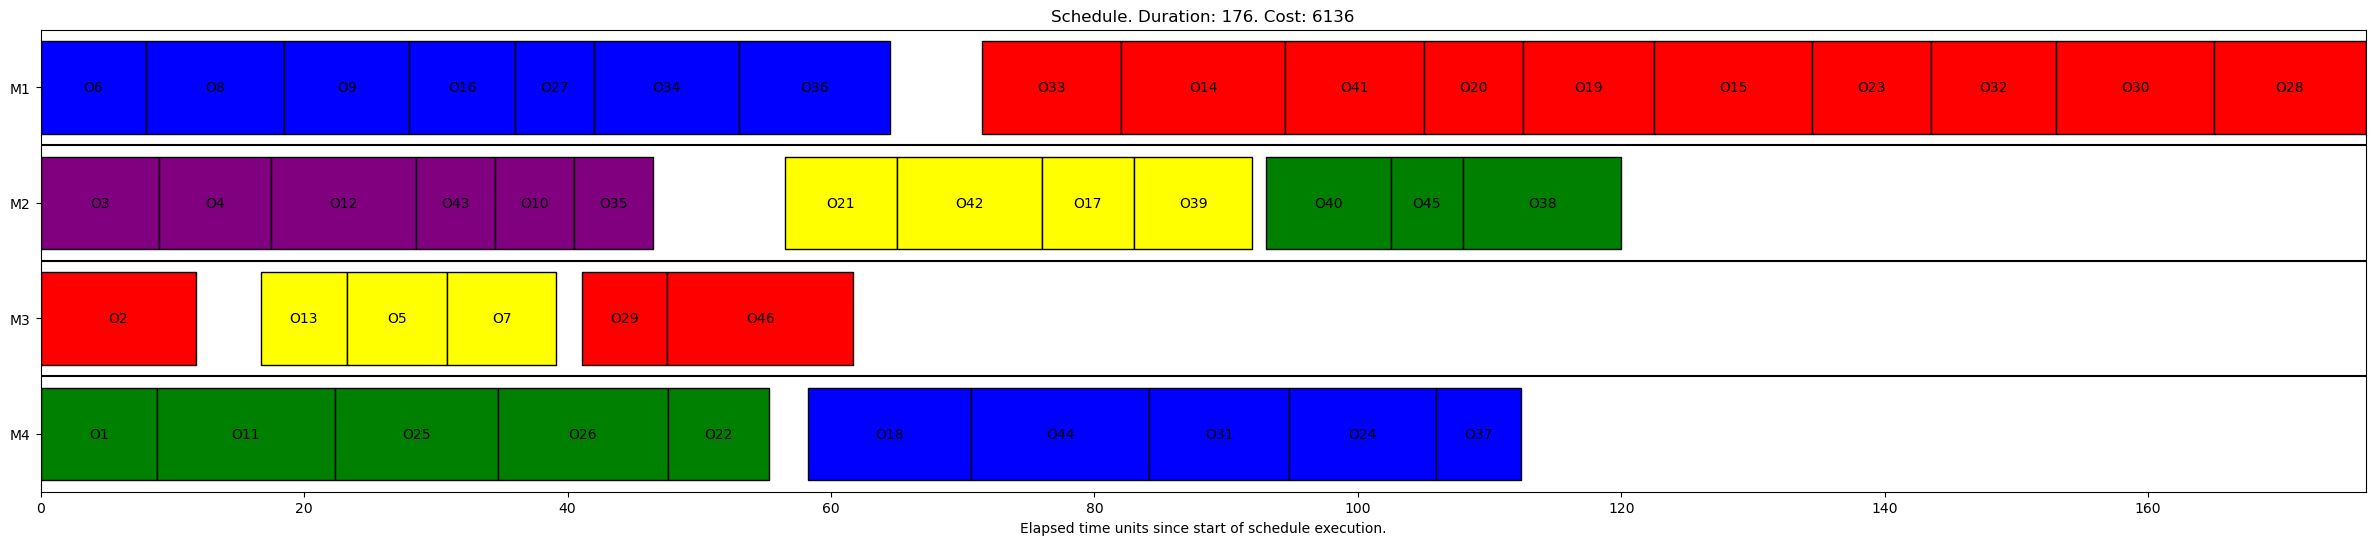

In [5]:
from random import choice

print(opt.best)
print()

move = choice([move for move in get_moves(opt.best) if isinstance(move, SwapBatchMove)])
print(move)
moved = move.get_moved(opt.best)
print(moved)
moved.plot()